## Laboratory 1: Exercises

In [1]:
library(ggplot2)
library(tibble)
library(tidyverse)
library(readr)
library(scales)
library(ggpubr)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tidyr   1.2.0     v dplyr   1.0.8
v readr   2.1.2     v stringr 1.4.0
v purrr   0.3.4     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




## Exercise 1 - vectors and data frames
The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes[1]. Create vectors, holding the lake’s name and all the parameters and build a dataframe called scottish.lakes from the vectors:

- 1. evaluate the highest and lowest volume and area lake
- 2. order the frame with respect to the area and determine the two largest area lakes
- 3. by summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [2]:
data <- read.csv("Lakes.csv",header = T)
data

Name,Volume,Area,Length,Max_depth,Mean._depth,X
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<lgl>
Ness,7.45,56.0,39.0,230,132.0,NA
Lomond,2.60,71.0,36.0,190,37.0,NA
Morar,2.30,27.0,18.8,310,87.0,NA
Tay,1.60,26.4,23.0,150,60.6,NA
Awe,1.20,39.0,41.0,94,32.0,NA
Maree,1.09,28.6,20.0,114,38.0,NA
Ericht,1.08,18.6,23.0,156,57.6,NA
Lochy,1.07,16.0,16.0,162,70.0,NA
Rannoch,0.97,19.0,15.7,134,51.0,NA


In [3]:
name <-as.vector(data[['Name']])
volume <-as.vector(data[['Volume']])
area <-as.vector(data[['Area']])
length <-as.vector(data[['Length']])
max_depth <-as.vector(data[['Max_depth']])
mean_depth <-as.vector(data[['Mean._depth']])

#This two prints are to make sure we are getting a vector of strings back
print(name)
print(class(name))

 [1] "Ness"    "Lomond"  "Morar"   "Tay"     "Awe"     "Maree"   "Ericht" 
 [8] "Lochy"   "Rannoch" "Shiel"   "Katrine" "Arkaig"  "Shin"   
[1] "character"


In [4]:
#we already had a dataframe when read.csv was used, now we are going to rebuild it using the vectors

scottish.lakes = data.frame(name, volume, area,length,max_depth,mean_depth)
scottish.lakes

name,volume,area,length,max_depth,mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
Ness,7.45,56.0,39.0,230,132.0
Lomond,2.60,71.0,36.0,190,37.0
Morar,2.30,27.0,18.8,310,87.0
Tay,1.60,26.4,23.0,150,60.6
Awe,1.20,39.0,41.0,94,32.0
Maree,1.09,28.6,20.0,114,38.0
Ericht,1.08,18.6,23.0,156,57.6
Lochy,1.07,16.0,16.0,162,70.0
Rannoch,0.97,19.0,15.7,134,51.0


In [5]:
cat("Highest volume: ",max(scottish.lakes$volume),"km3 was found in lake",paste(scottish.lakes$name[which.max(scottish.lakes$volume)]))
cat("\n")
cat("Lowest volume: ",min(scottish.lakes$volume),"km3 was found in lake",paste(scottish.lakes$name[which.min(scottish.lakes$volume)]))
cat("\n")
cat("Highest area: ",max(scottish.lakes$area),"km2 was found in lake",paste(scottish.lakes$name[which.max(scottish.lakes$area)]))
cat("\n")
cat("Lowest area: ",min(scottish.lakes$area),"km2 was found in lake",paste(scottish.lakes$name[which.min(scottish.lakes$area)]))
#At first I got a number instead of the name of the lake but was fixed with "paste"

Highest volume:  7.45 km3 was found in lake Ness
Lowest volume:  0.35 km3 was found in lake Shin
Highest area:  71 km2 was found in lake Lomond
Lowest area:  12.4 km2 was found in lake Katrine

In [6]:
scottish.lakes = scottish.lakes %>% arrange(desc(area))
#Proceding extract the first 2 elements in the previously arranged dataframe
head(scottish.lakes, 2)

,name,volume,area,length,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Lomond,2.60,71,36,190,37
2,Ness,7.45,56,39,230,132


In [7]:
#Summing over a column

cat("The sum of the areas of the lakes is: ",sum(scottish.lakes$area),"km2. Which represents the area of scotland covered by water")

The sum of the areas of the lakes is:  372 km2. Which represents the area of scotland covered by water

## Exercise 2 - Crude Oil Production

The following CSV file
https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data
on crude oil prices from 1861 to 2020, measured in US dollars per barrel [2].
- 1 Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).
- 2 produce a plot with the Oil price as a function of the year
- 3 which is the highest price in history ? When did it occur ?
- 4 plot the derivative of the curve, simply evaluated with the finite difference formula

In [8]:
dataframe <- read.csv("crude-oil-prices.csv")
head(dataframe)

,Entity,Code,Year,Price
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


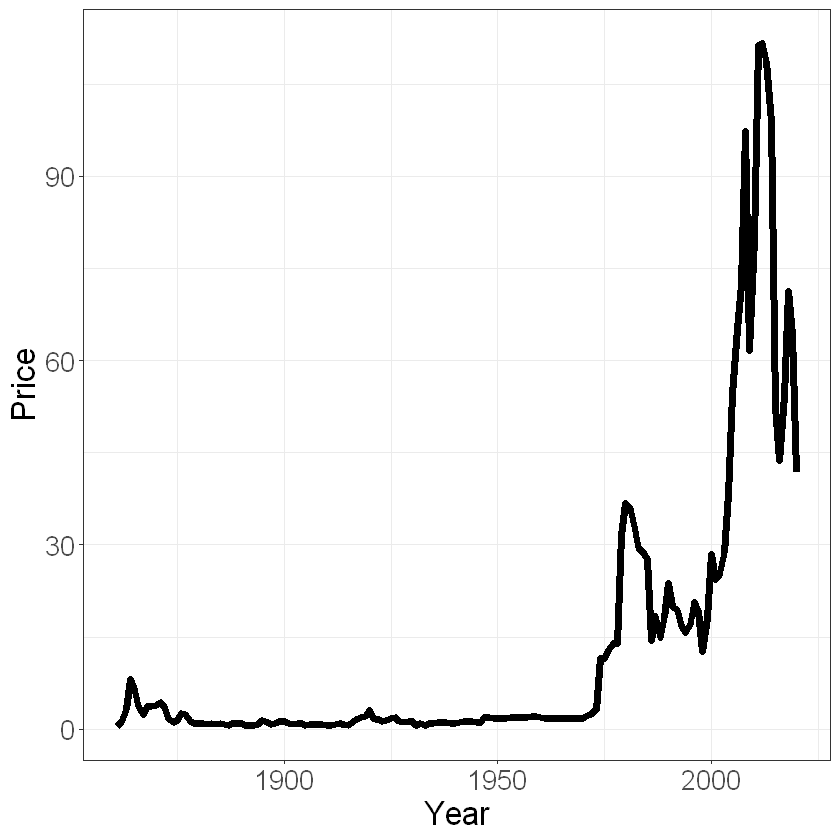

In [9]:
ggplot(dataframe, aes(x = Year,y = Price))+
      stat_summary(fun=sum, geom="line",size=2)+scale_y_continuous(labels=comma)+
      theme_bw()+theme(text = element_text(size = 20))  
#I need to put theme(text = element_text(size = 20)) after theme_bw() or it doesnt work

In [10]:
#which.max(dataframe$Price)
cat("Year of the highest gas price: ",max(dataframe[4]),"dollars on the year",dataframe$Year[which.max(dataframe$Price)])

Year of the highest gas price:  111.6697 dollars on the year 2012

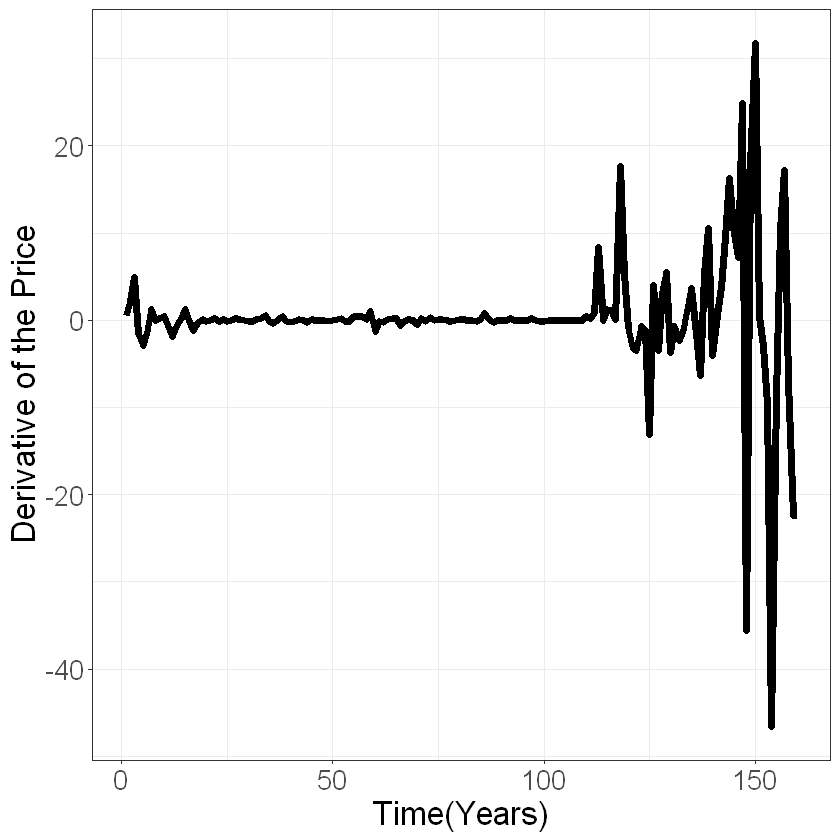

In [11]:
finite.differences <- function(x, y) {
  n <- length(x)
  fdx <- vector(length = n)
  
  # Iterate through the values using the forward differencing method
  for (i in 2:n) {
    fdx[i-1] <- (y[i-1] - y[i]) / (x[i-1] - x[i])
  }
  
  #We can use backwards differenciation for the last value
  fdx[n] <- (y[n] - y[n - 1]) / (x[n] - x[n - 1])
  
  return(fdx)
}


finite <- finite.differences(dataframe$Year, dataframe$Price)
finite_df <- data.frame(finite)

ggplot(finite_df, aes(x = 1:nrow(finite_df),y =finite))+
      stat_summary(fun=sum, geom="line",size=2)+scale_y_continuous(labels=comma)+labs(x = "Time(Years)",y="Derivative of the Price")+
       theme_bw() +theme(text = element_text(size = 20))



## Exercise 3 - World Coal Production

• The following CSV file
https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing contains data on the coal production (in TW · hour) for several countries in the World [3].

- 1 Write R code that is able to read the file and import it in a tibble [4] structure
- 2 count the number of countries available in the file and produce a barplot with the number of entries for each country for the following items select only the years ≥ 1970:
- 3 selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions
- 4 for the 5 top Countries, create a plot of production as a function of time
- 5 generate a plot with the cumulative sum of the World’s coal production over the years

In [12]:
dataframe <- read.csv("coal-production-by-country.csv")
tibbleframe <- as_tibble(dataframe)
head(tibbleframe)

Entity,Code,Year,Coal_production
<chr>,<chr>,<int>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


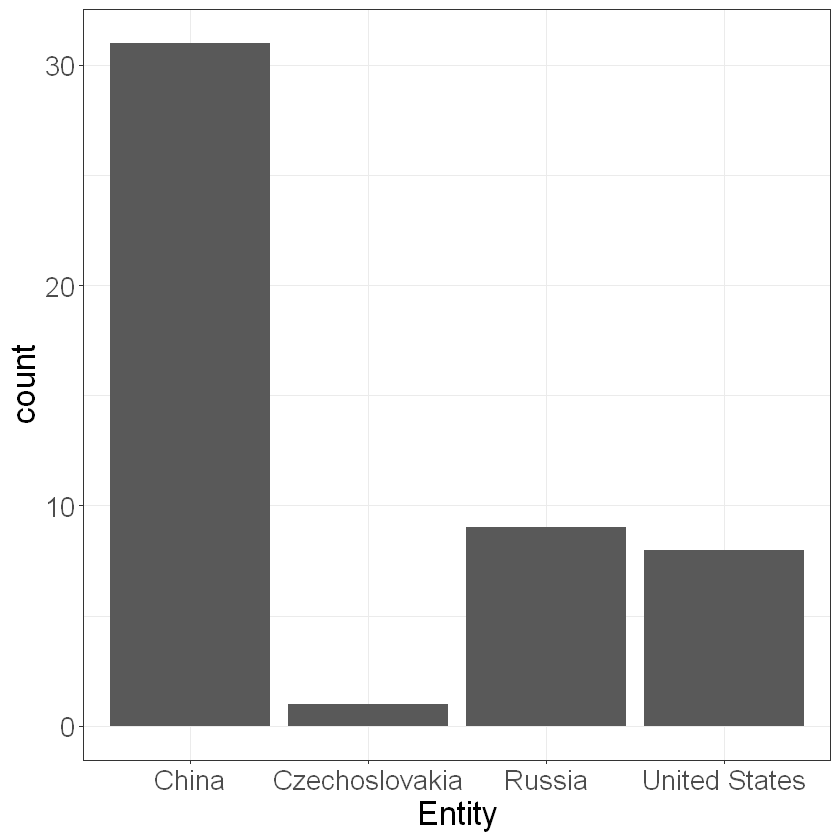

In [13]:
countries <- subset(tibbleframe, Year > 1970, select=c(Entity,Code,Year,Coal_production))
countries = countries[countries$Code != "" & countries$Entity != "World", ]

countries_filtered <- countries %>% 
    group_by(Year) %>% 
    slice(which.max(Coal_production))

ggplot(countries_filtered, aes(x=Entity)) + geom_bar(stat = "count")+ theme_bw() +theme(text = element_text(size = 20))

In [14]:
#I did this as a way to check if Czechoslovakia was actually in the list. It appears in 1980
filter(countries_filtered,Code =="OWID_CZS") 

Entity,Code,Year,Coal_production
<chr>,<chr>,<int>,<dbl>
Czechoslovakia,OWID_CZS,1980,451.147


In [15]:
#For part 3, a new column containing the cumulative sum is created
sum_production <- countries %>% 
    group_by(Entity) %>% mutate(cs = cumsum(Coal_production))

In [16]:
#I arrenged the dataset and show the first five entries as the desired output

sum_production <- sum_production %>% 
    group_by(Entity) %>% 
    slice(which.max(cs))

sum_production <- sum_production %>% arrange(desc(cs))
head(subset(sum_production, select=c(Entity,Code,cs)), 5)


Entity,Code,cs
<chr>,<chr>,<dbl>
China,CHN,459564.65
United States,USA,226068.84
Russia,RUS,98251.65
Australia,AUS,83077.07
India,IND,77043.45


In [17]:
#Need to get a vector of codes to feed it to ggplot

top5 <- sum_production[1:5,2]
top5$Code

[1] "CHN" "USA" "RUS" "AUS" "IND"

Warning message in Code == top5$Code:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"


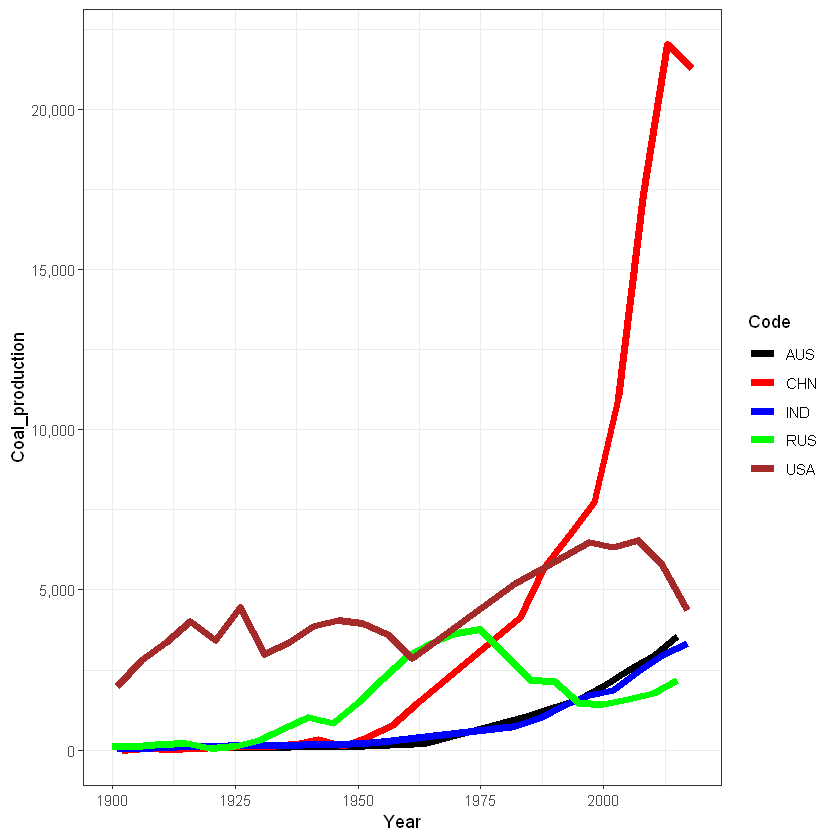

In [18]:
#Using size = 2 on stat_summary to make lines thicker, default was too thin

ggplot(filter(tibbleframe, Code == top5$Code), aes(x = Year,y = Coal_production ,color=Code)) + scale_color_manual(values = c("black", "red", "blue","green","brown") )+
      stat_summary(fun=sum, geom="line",size=2)+scale_y_continuous(labels=comma)+
      theme(text = element_text(size = 20))  + theme_bw()

## Exercise 4: Covid Vaccine Data


Data on Covid-19 vaccine can be found on [5].

• The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv) contains a summary
on the vaccination data grouped by Vaccine type and Country.

1. filter() the original tibble by selecting the following countries: Italy<br>
2. plot the number of vaccines given as a function of time for the different vaccine manufacturer<br>
3. from the same tibble plot the total number of vaccines shot per day in Italy<br>
4. do the same exercise for the following countries: Germany and United States of America<br>

• The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19
vaccinations.<br> The dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, . . .) and international aggregates (World, continents, European Union ldots). 

They can be identified by their iso code that starts with OWID<br>
1. selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date<br>
2. study the data structure and produce few relevant plots of your taste

In [19]:
urlfile="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"

mydata<-read_csv(url(urlfile))


Rows: 36133 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): location, vaccine
dbl  (1): total_vaccinations
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
head(mydata,10)

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Argentina,2020-12-29,Moderna,2
Argentina,2020-12-29,Oxford/AstraZeneca,5
Argentina,2020-12-29,Sinopharm/Beijing,1
Argentina,2020-12-29,Sputnik V,20481
Argentina,2020-12-30,Moderna,2
Argentina,2020-12-30,Oxford/AstraZeneca,5
Argentina,2020-12-30,Sinopharm/Beijing,1
Argentina,2020-12-30,Sputnik V,40583
Argentina,2020-12-31,Moderna,2


In [79]:
#This function was made by the need to fill certain parts of the dataset to be plotted correctly. 
#I understand there is a built in function but I was hoping to make this work as practice

vaccine_location <- function(location_) {
    vaccine_filtered <- mydata %>%
      filter(location == location_) 
    
    
datestart <- vaccine_filtered[1,2]

    
    
for(i in 2:nrow(vaccine_filtered)) {

 #Using datestart as our starting date, we start picking todays and yesterdays entries   
    today_vaccines <-  filter(vaccine_filtered,date == datestart$date+i-1)[,3]
    yesterday_vaccines <-  filter(vaccine_filtered,date == datestart$date+i-2)[,3]
#... Only up to today, because the number of rows in the dataset exeeds 1500
        if (datestart$date+i-1 == Sys.Date() ){
            break 
        }
#We want to check if some of the vaccine brands administrated yesterday are missing today
    for (j in 1:nrow(yesterday_vaccines)){

        if ((yesterday_vaccines$vaccine[j] %in% today_vaccines$vaccine) == FALSE) {
            
               swap <-filter(filter(vaccine_filtered,date == datestart$date+i-2),vaccine == yesterday_vaccines$vaccine[j])
               swap$date <- datestart$date+i-1
            
                if (length(swap$vaccine) == 1){
                    #And fill the void with yesterdays result
             vaccine_filtered[nrow(vaccine_filtered) + 1,] <- swap
                } 
         }      

     }   

}
i <- 0  

    
#We prepare for another loop that will get the vaccines administrated per day
datestart <- vaccine_filtered[1,2]
daterange <-seq(datestart$date, Sys.Date(), by="days")
per_day <- vector(length = length(daterange))   
    
for(i in 2:nrow(vaccine_filtered)) {

 #Using datestart as our starting date, we start picking todays and yesterdays entries   
    today_vaccines <-  filter(vaccine_filtered,date == datestart$date+i-1)
    yesterday_vaccines <-  filter(vaccine_filtered,date == datestart$date+i-2)
#... Only up to today, because the number of rows in the dataset exeeds 1500
        if (datestart$date+i-1 == Sys.Date() ){
            break 
        }

    diff <- Reduce("+", today_vaccines$total_vaccinations) - Reduce("+", yesterday_vaccines$total_vaccinations) 
    per_day[i]<-diff



}  
    
#We create a dataframe using the date range and the number of vaccines per day
per_day_df <- data.frame(per_day,daterange)

    
#We also take this chance to make this function plot the relevant graphs for this exerceise 
options(repr.plot.width=16, repr.plot.height=24)
    
   
p1 <-  ggplot(vaccine_filtered,aes(x = date,y = total_vaccinations,color=vaccine)) + scale_color_manual(values = c("black", "red", "blue","green","yellow") ) +
      geom_point()+labs(x = "Time",y="# of Vaccines administrated")+scale_y_continuous(labels=comma) +
       theme_bw()+ theme(text = element_text(size = 20)) 
    
    
p2 <-  ggplot(vaccine_filtered, aes(x = date,y = total_vaccinations)) +
      stat_summary(fun=sum, geom="point")+scale_y_continuous(labels=comma)+
       theme_bw() +theme(text = element_text(size = 20))
    
p3 <-  ggplot(per_day_df, aes(x = daterange,y = per_day))+
      stat_summary(fun=sum, geom="line")+labs(x = "Time",y="# of Vaccines administrated per day")+scale_y_continuous(labels=comma)+
      theme_bw()+ theme(text = element_text(size = 20))
 
    
ggarrange(p1, p2, p3,
          labels = c(paste("Vaccines by Manufacturer: ",location_) , paste("Total Vaccines administrated: ",location_), paste("Vaccines per day: ",location_)),
          ncol = 1, nrow = 3)   
    
    
    
    
}

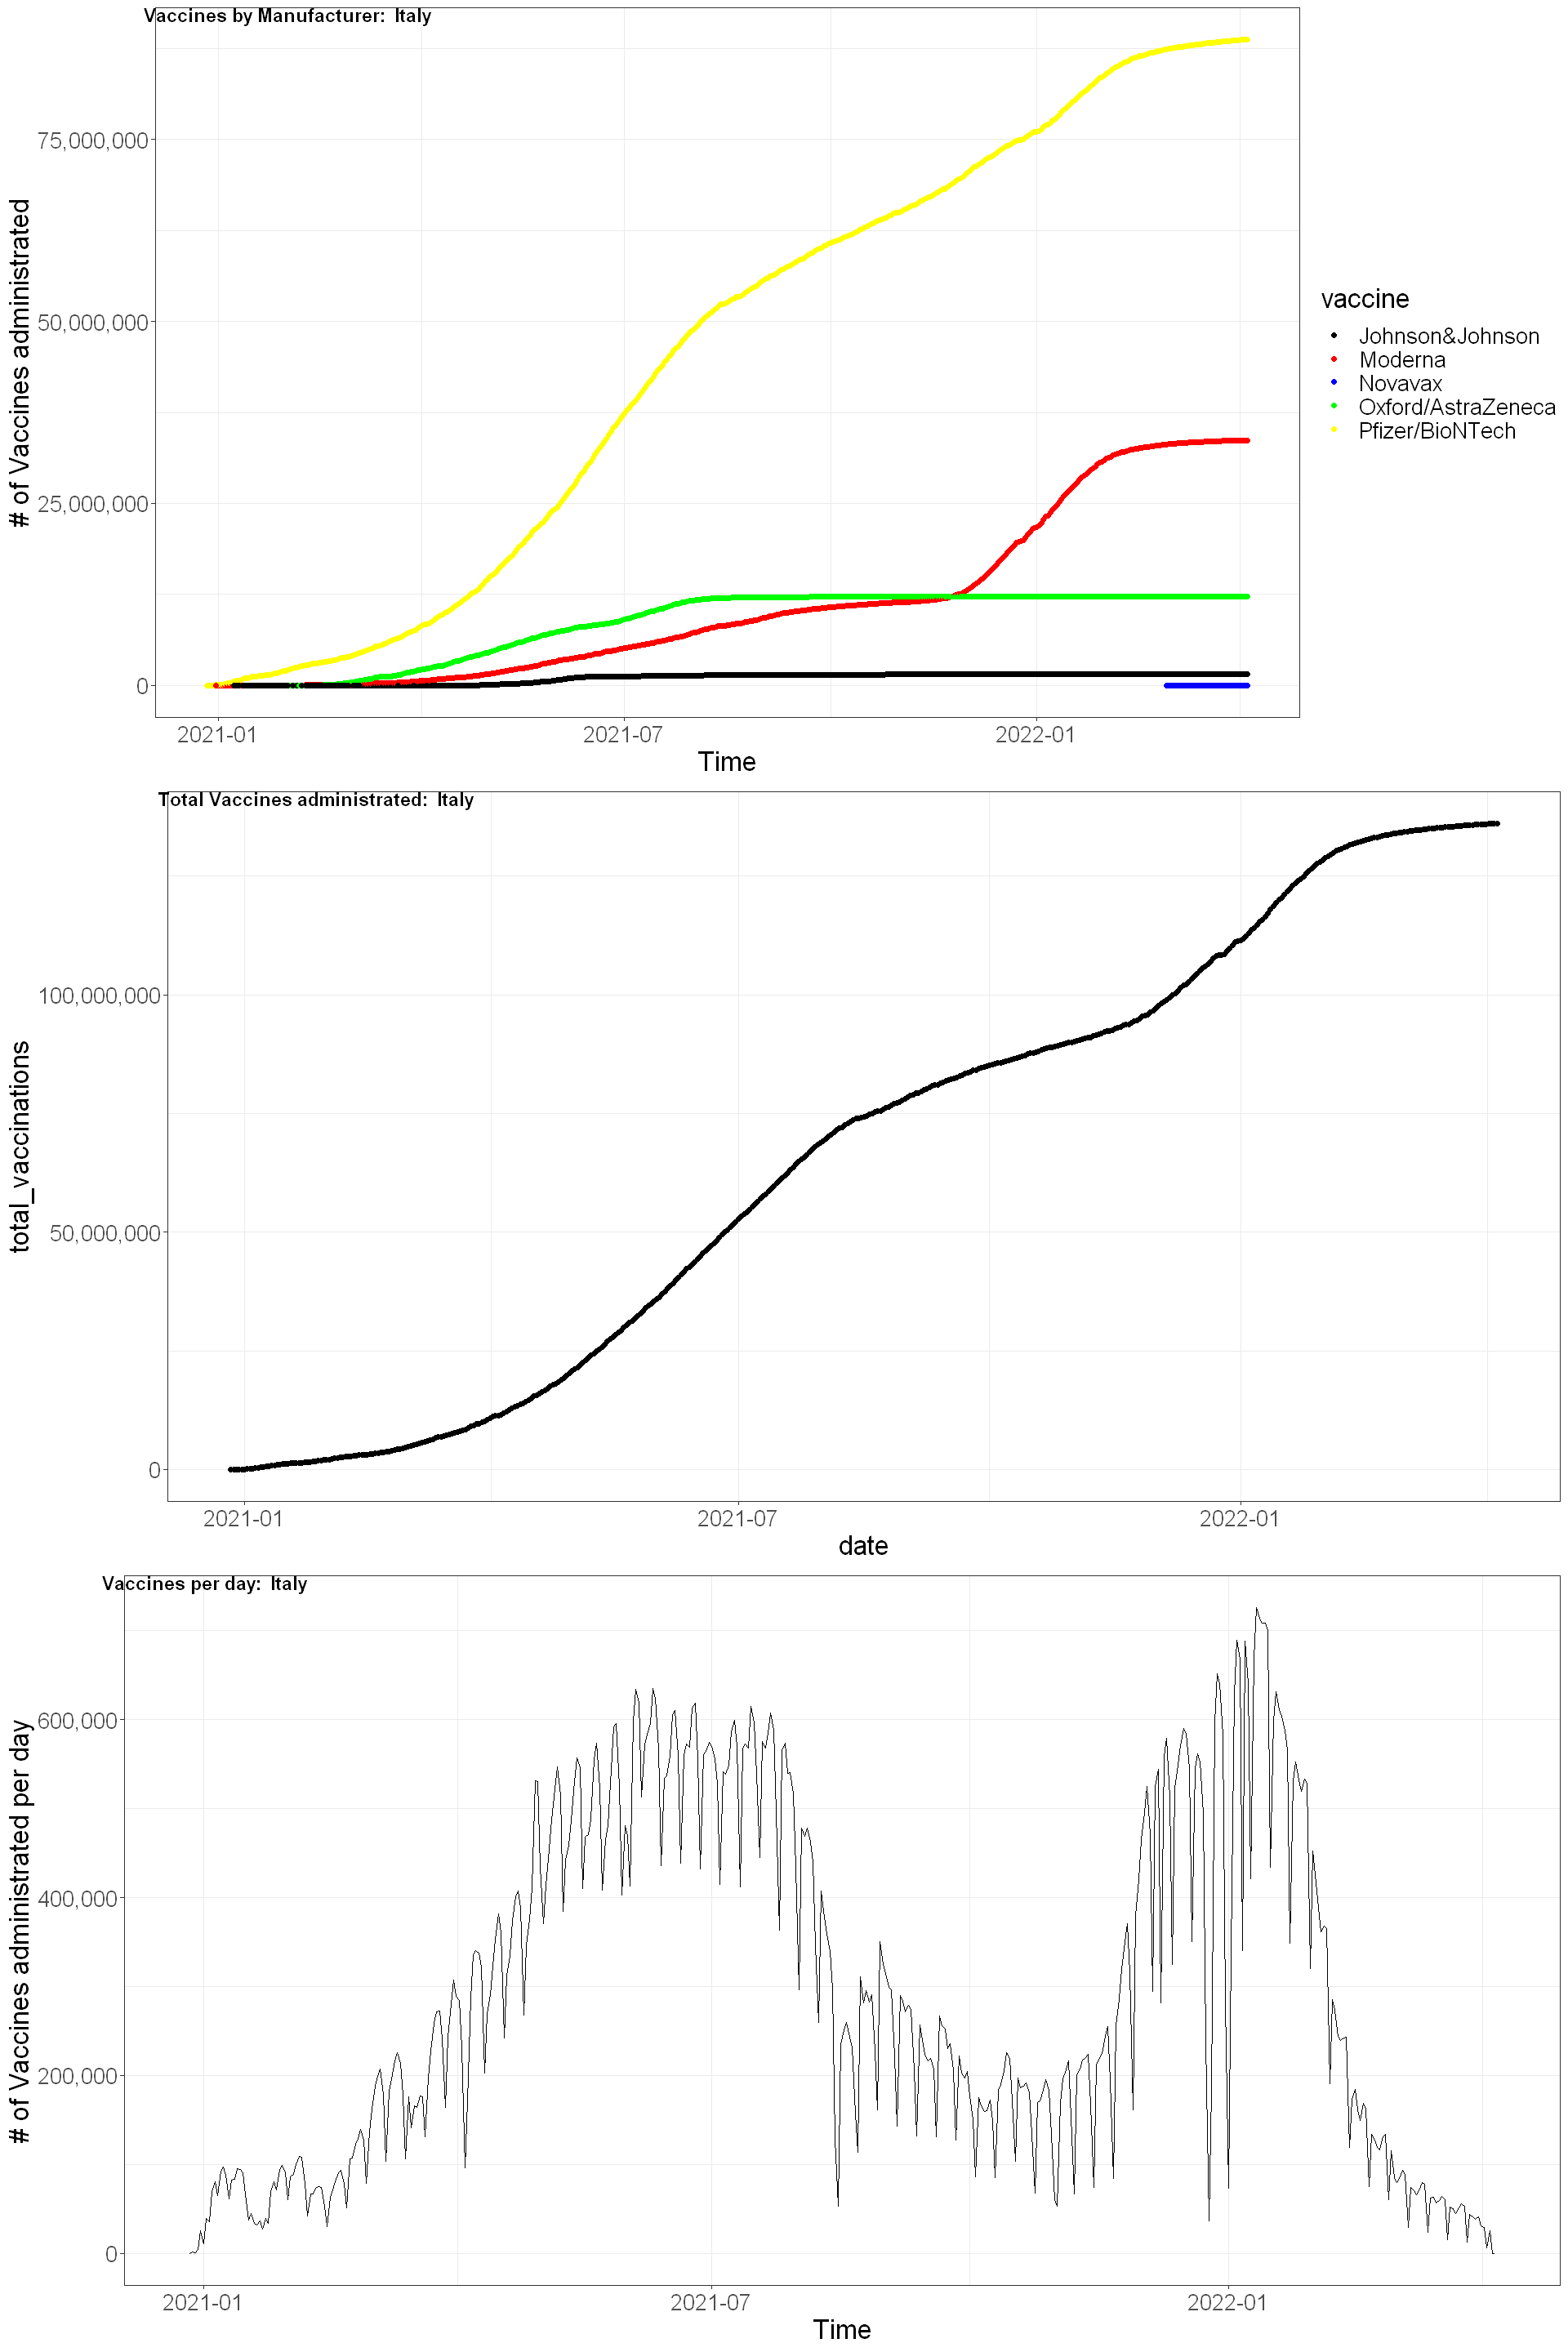

In [80]:
vaccine_location("Italy")

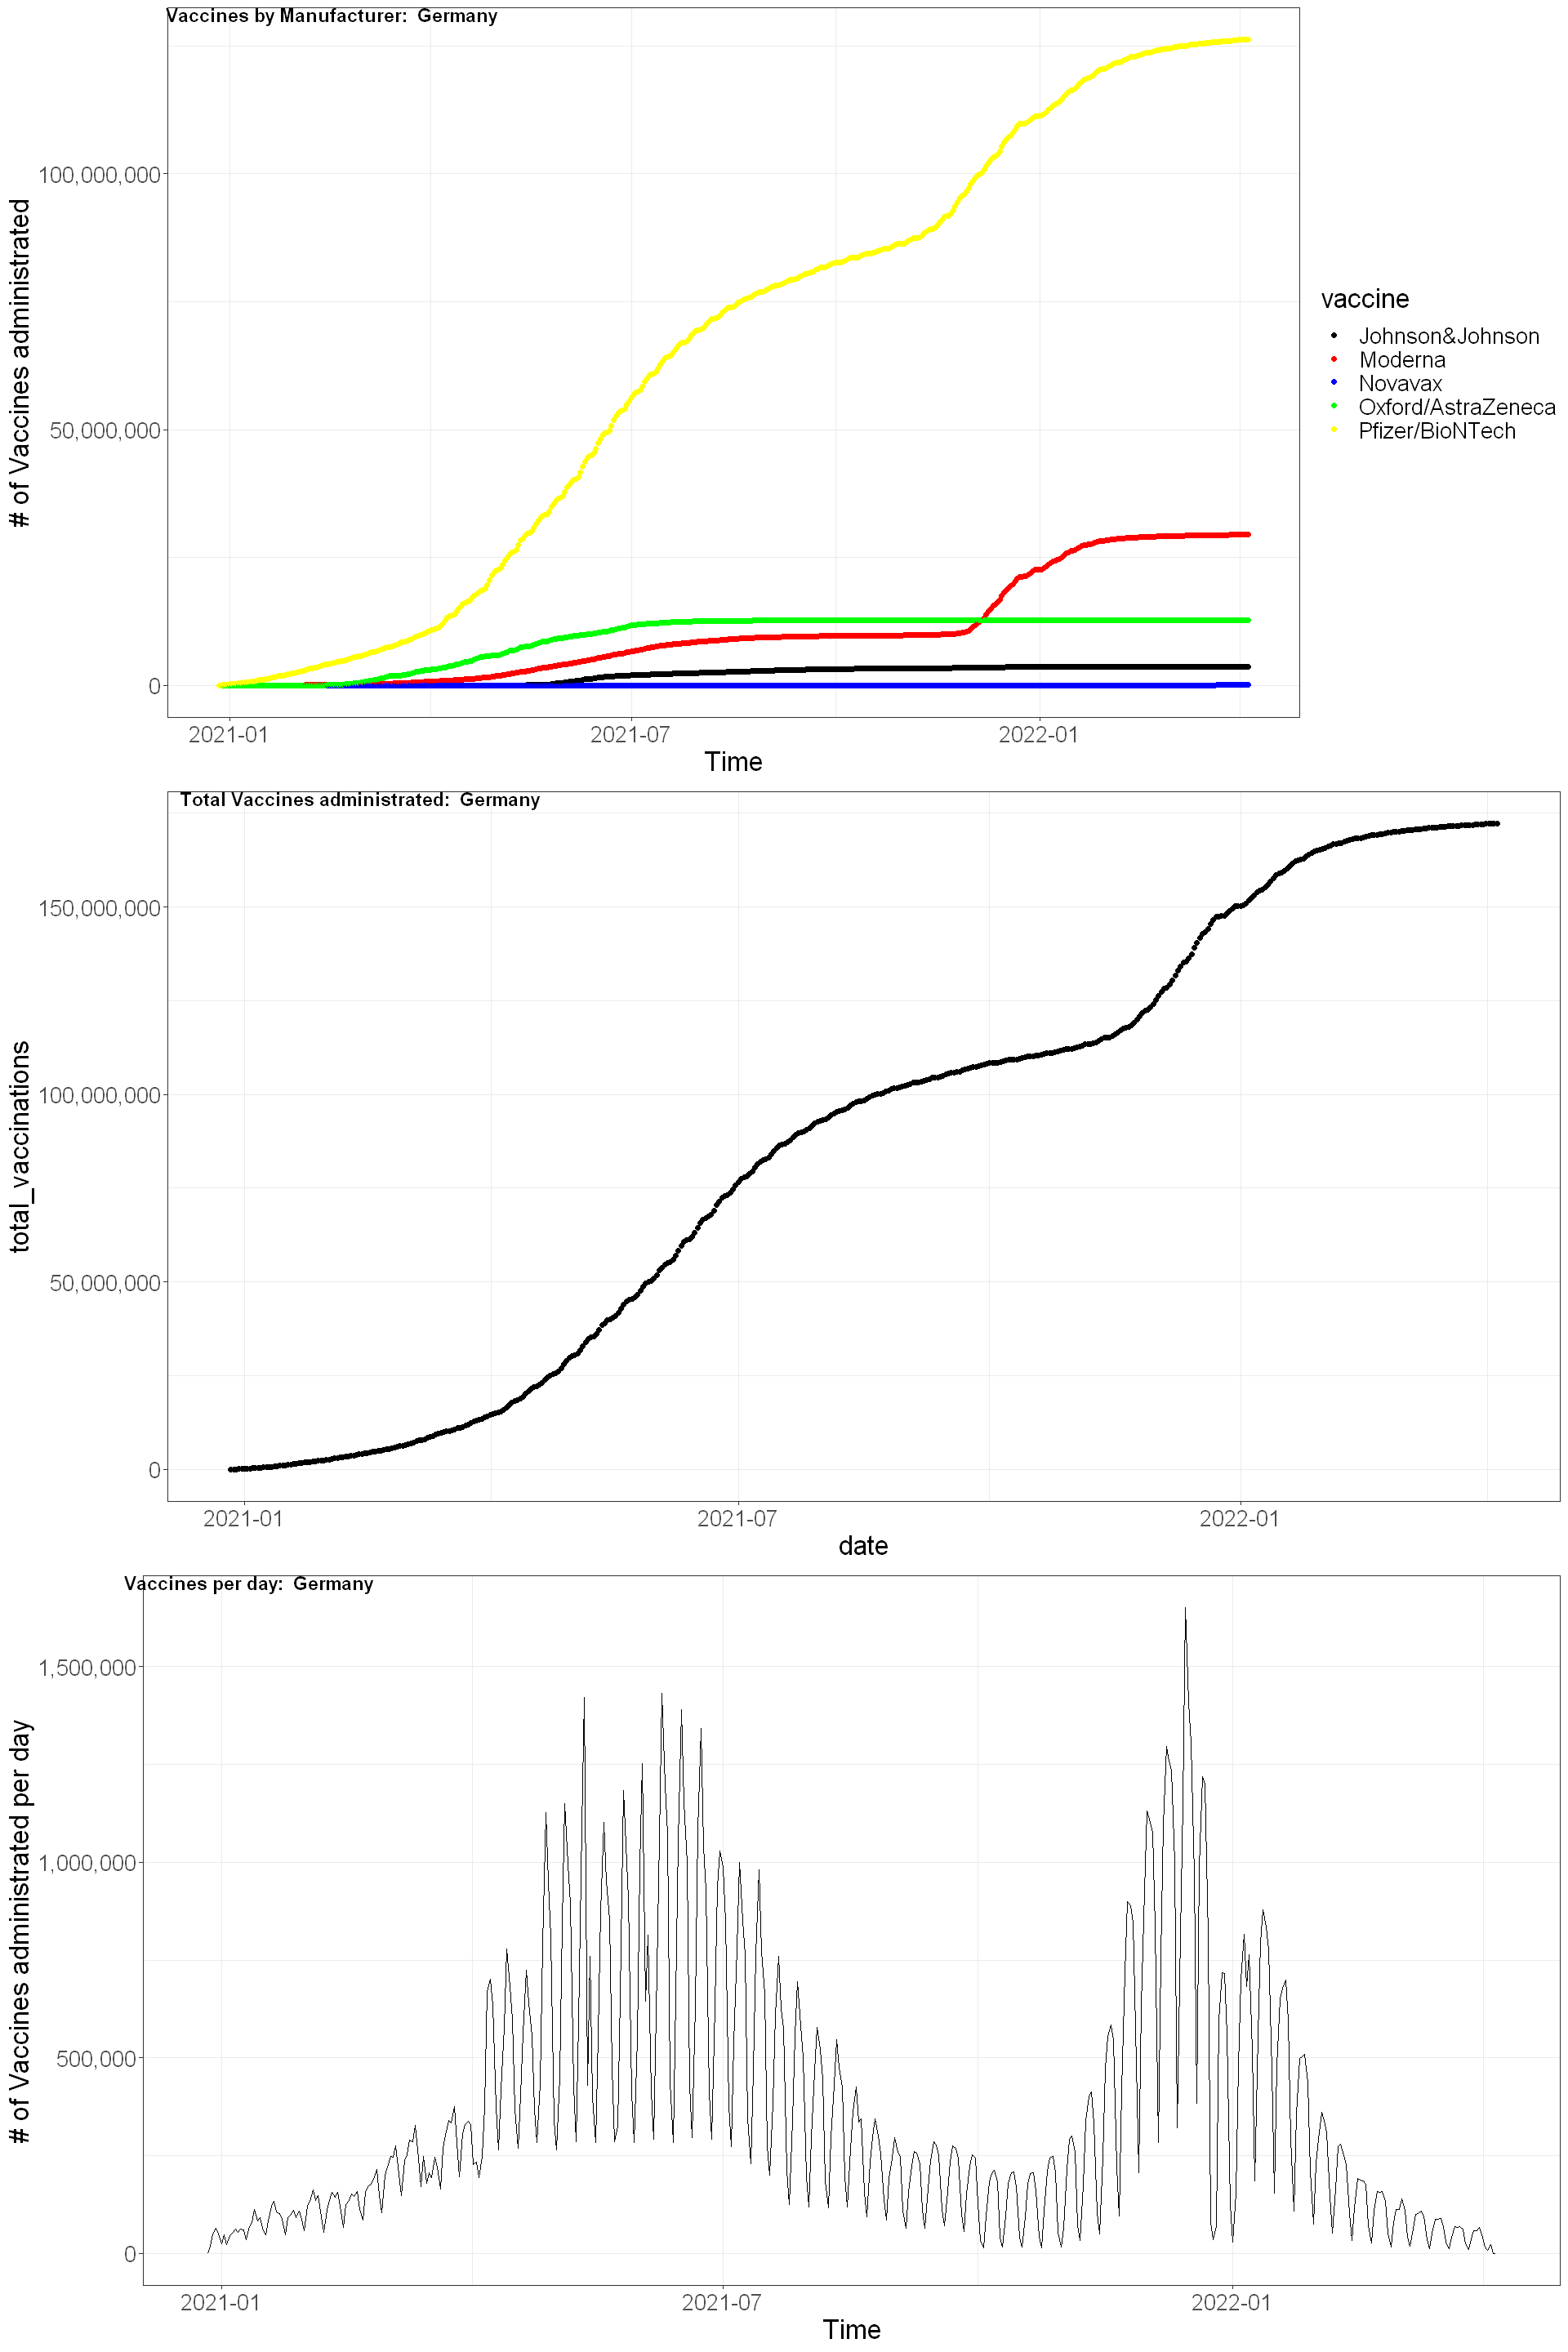

In [81]:
vaccine_location("Germany")


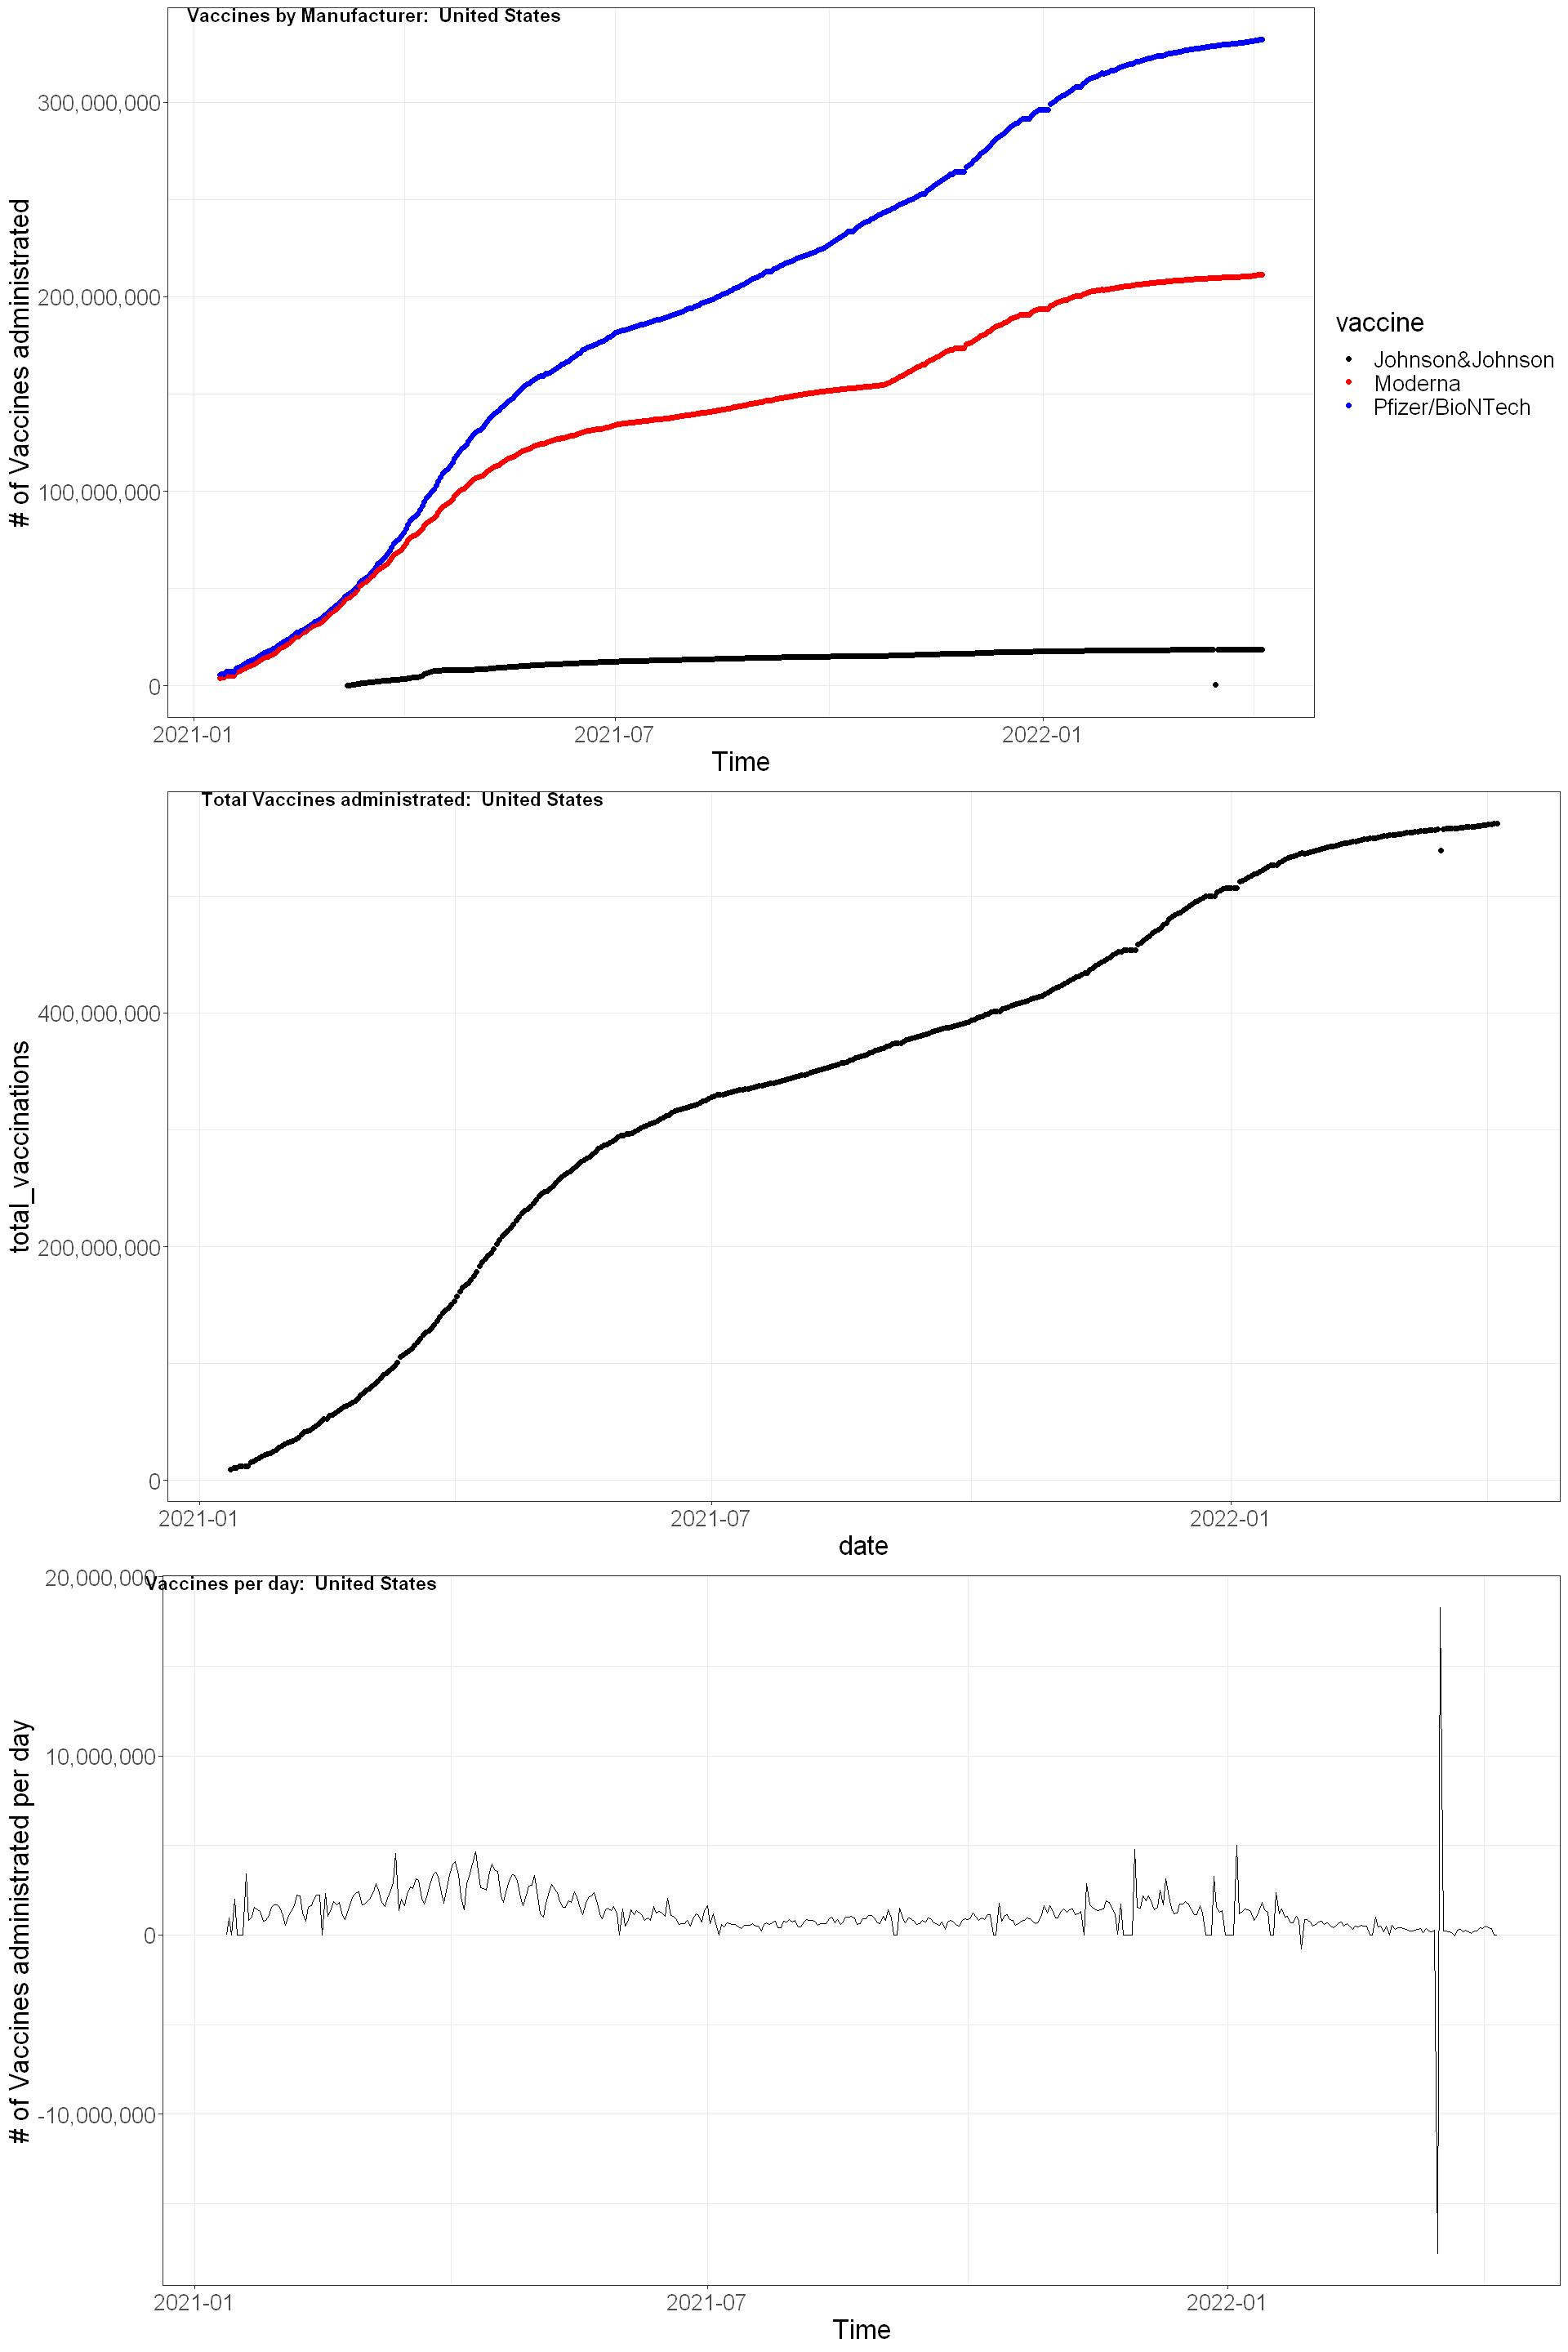

In [82]:
vaccine_location("United States")

In [60]:
## Part 2 of Exercise 4

##selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date
##study the data structure and produce few relevant plots of your taste

urlfile="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

mydata2<-read_csv(url(urlfile))

Rows: 93395 Columns: 16
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr   (2): location, iso_code
dbl  (13): total_vaccinations, people_vaccinated, people_fully_vaccinated, t...
date  (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [61]:
head(mydata2)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003


In [62]:
#Loading a list to filter selected countries
europeanUnion <- c("Austria","Belgium","Bulgaria","Croatia","Cyprus",
                   "Czech Rep.","Denmark","Estonia","Finland","France",
                   "Germany","Greece","Hungary","Ireland","Italy","Latvia",
                   "Lithuania","Luxembourg","Malta","Netherlands","Poland",
                   "Portugal","Romania","Slovakia","Slovenia","Spain",
                   "Sweden","United Kingdom")

In [1]:
vaccine_EU <- mydata2 %>%
      filter(location == europeanUnion) 
options(repr.plot.width=16, repr.plot.height=8)
ggplot(vaccine_EU,aes(x = date,y = total_vaccinations,color=location)) + 
      geom_line(size = 1)+labs(x = "Time",y="# of Vaccines administrated")+scale_y_continuous(labels=comma) +
      theme(text = element_text(size = 20))  

ERROR: Error in mydata2 %>% filter(location == europeanUnion): no se pudo encontrar la función "%>%"


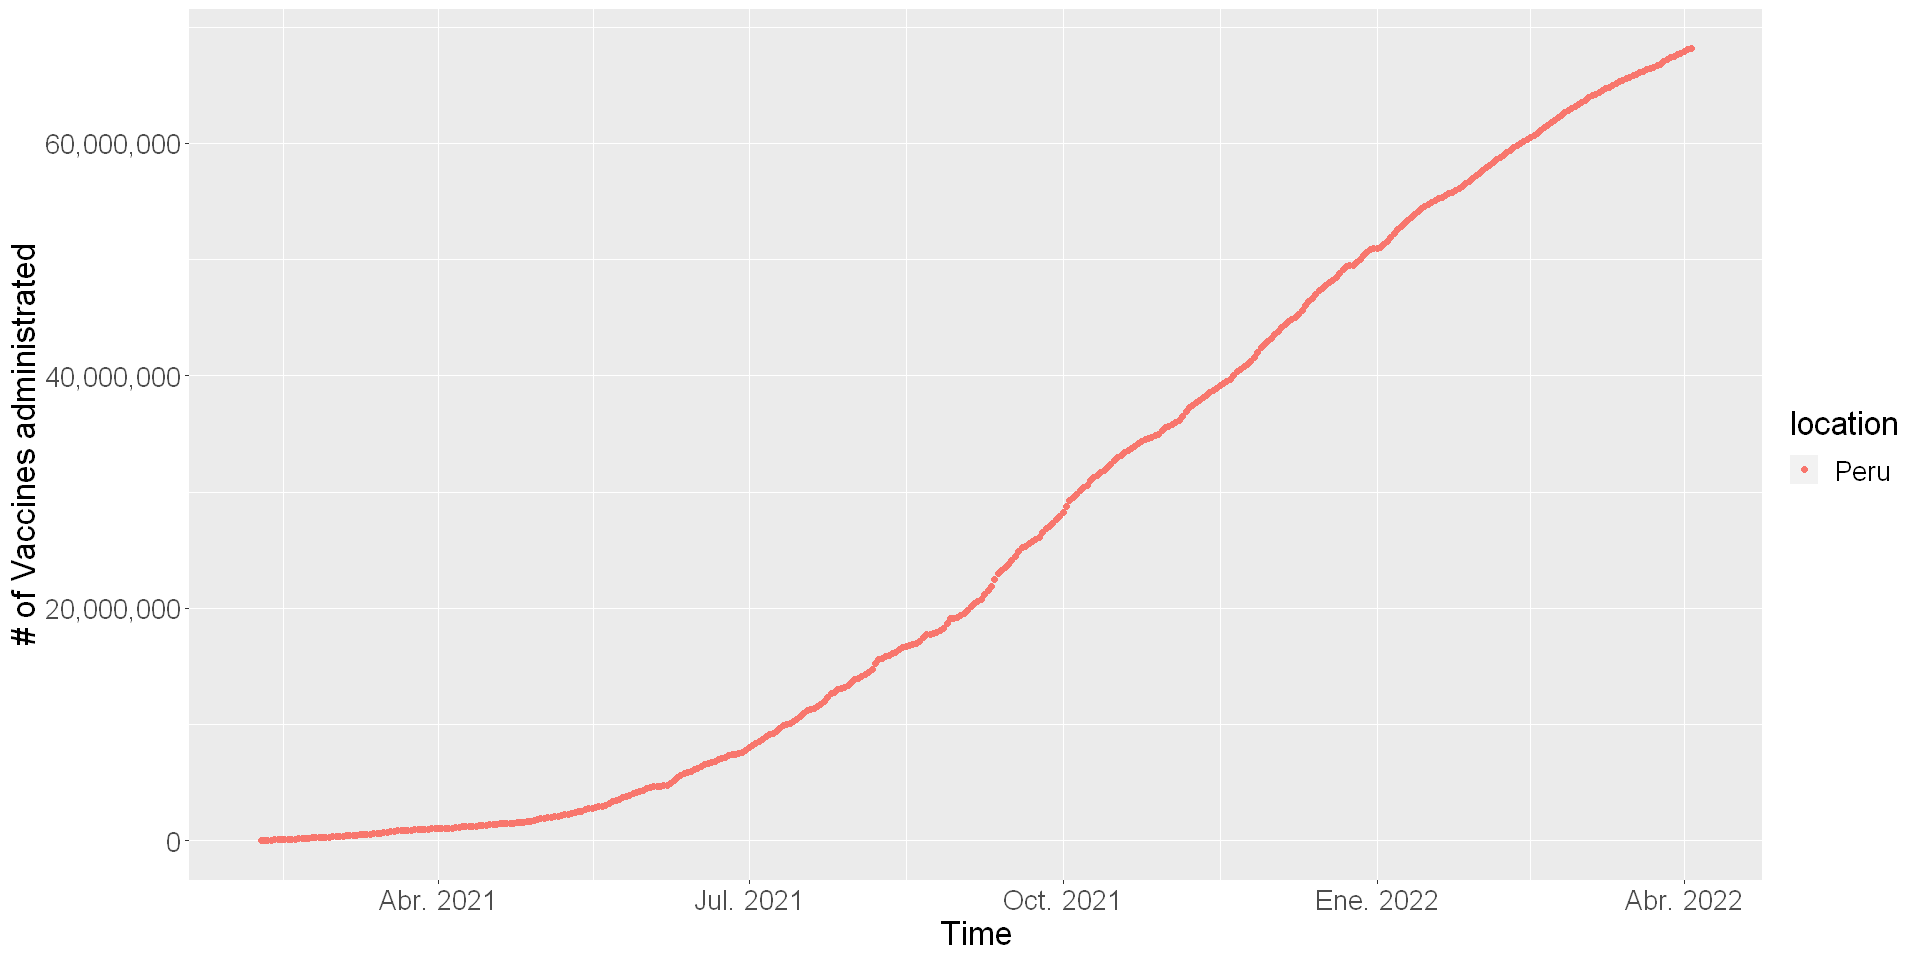

In [64]:
vaccine_per <- mydata2 %>%
      filter(iso_code == "PER") 

ggplot(vaccine_per,aes(x =date,y = total_vaccinations,color=location)) + 
      geom_point()+labs(x = "Time",y="# of Vaccines administrated")+scale_y_continuous(labels=comma) +
      theme(text = element_text(size = 20))  

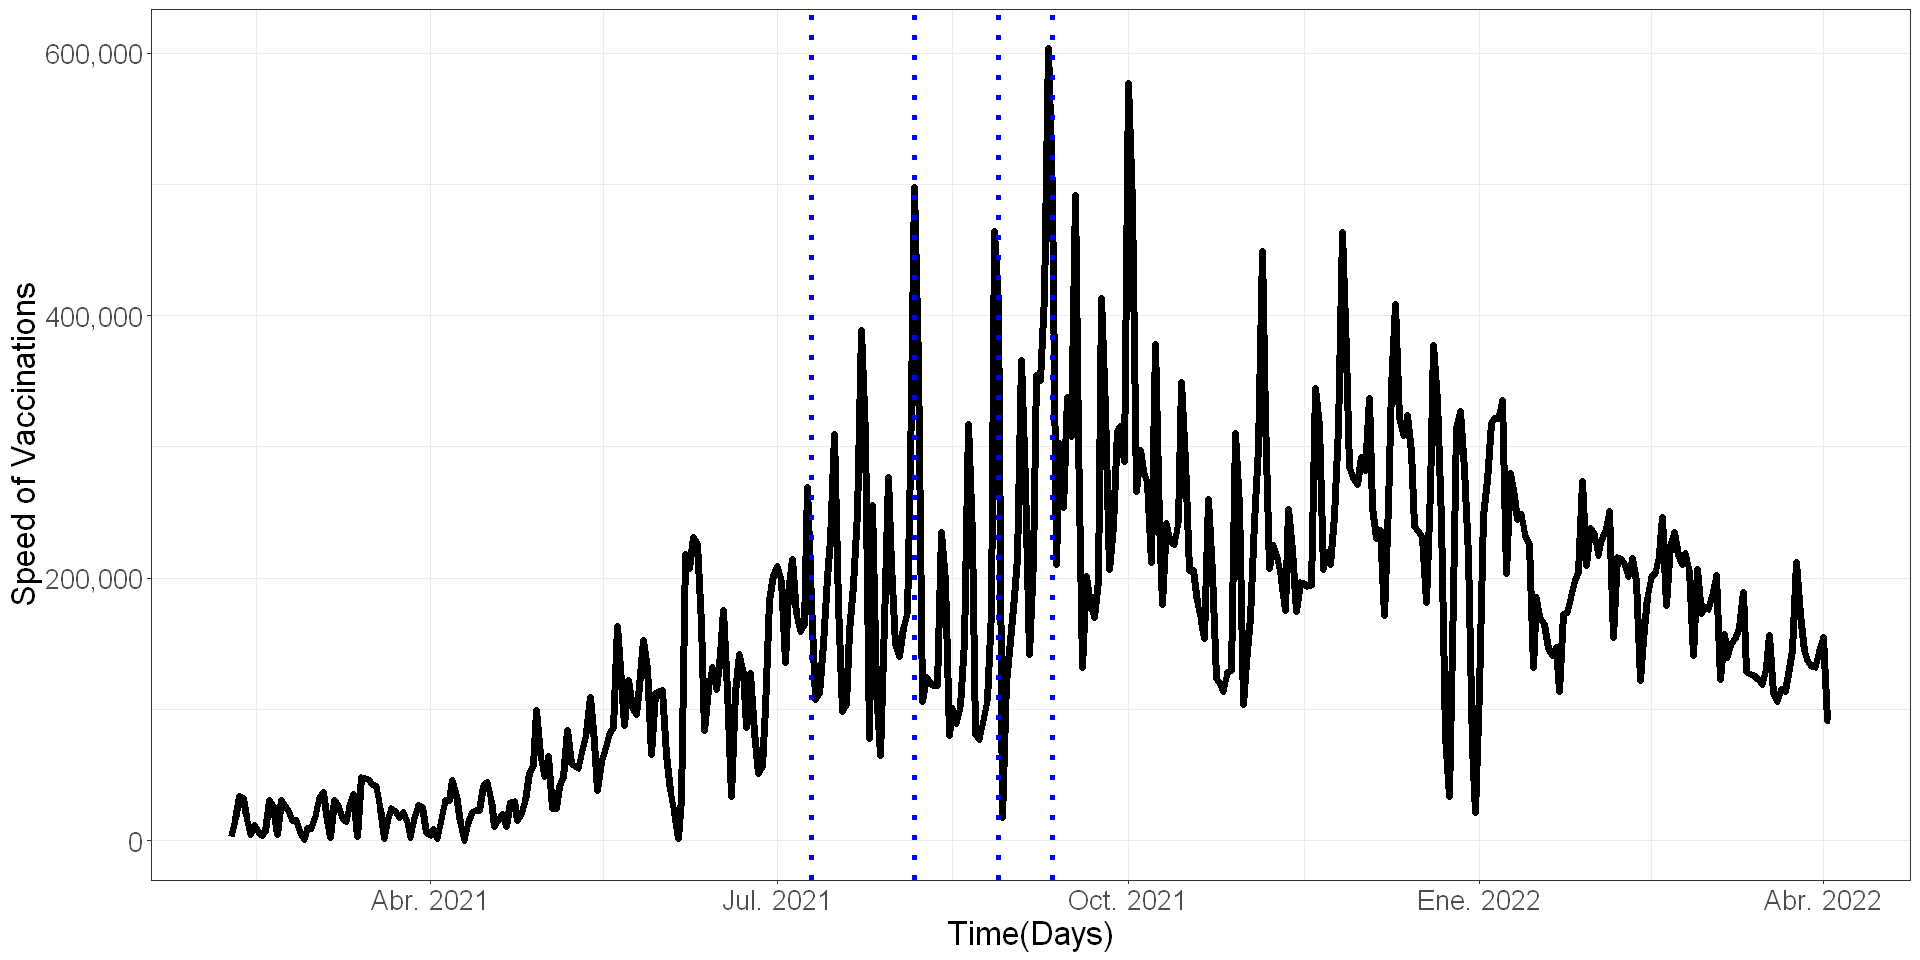

In [65]:
finite <- finite.differences(1:nrow(vaccine_per), vaccine_per$total_vaccinations)
finite_df <- data.frame(finite)

ggplot(finite_df, aes(x = vaccine_per$date,y =finite))+
      stat_summary(fun=sum, geom="line",size=2)+scale_y_continuous(labels=comma)+labs(x = "Time(Days)",y="Speed of Vaccinations")+
       theme_bw() +theme(text = element_text(size = 20))+
       geom_vline(xintercept = c(as.Date("2021-07-10"),as.Date("2021-08-06"),as.Date("2021-09-11"),as.Date("2021-08-28")), linetype="dotted", 
                color = "blue", size=1.5)

#For the final exercise I decided to derive the total vaccinations in my home country and plot 
#some blue dotted lines in dates where an envent called "Vacunaton"(Later renamed Vacunafest) 
#took place, we can see that those events correlate with spikes of the vaccination rate
#for the massive amounts of vaccines administrated at these events
#The dates were taken from https://es.wikipedia.org/wiki/Vacunaci%C3%B3n_contra_la_COVID-19_en_Per%C3%BA